# Importing libraries

In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_erro
from xgboost import XGBRegressor

# Loading dataset

In [7]:
data=pd.read_csv("C:/Users/Hema Priya/Downloads/2 Year IBM Stock Data.csv")
data

,time,open,high,low,close,volume
0,3/25/2022 19:19,131.300000,131.300000,131.300000,131.300000,718
1,3/25/2022 19:18,131.300000,131.300000,131.300000,131.300000,282
2,3/25/2022 17:50,131.300000,131.300000,131.300000,131.300000,100
3,3/25/2022 16:59,131.340000,131.350000,131.340000,131.350000,1427
4,3/25/2022 16:42,131.326000,131.350000,131.326000,131.350000,1326
...,...,...,...,...,...,...
216878,4/6/2020 7:27,95.385037,95.385037,95.385037,95.385037,854
216879,4/6/2020 7:25,94.530379,94.530379,94.530379,94.530379,450
216880,4/6/2020 7:08,94.703037,94.703037,94.703037,94.703037,436
216881,4/6/2020 7:02,95.479999,95.479999,95.479999,95.479999,575


In [11]:
data = data.drop(columns=['time'])
data

,open,high,low,close,volume
0,131.300000,131.300000,131.300000,131.300000,718
1,131.300000,131.300000,131.300000,131.300000,282
2,131.300000,131.300000,131.300000,131.300000,100
3,131.340000,131.350000,131.340000,131.350000,1427
4,131.326000,131.350000,131.326000,131.350000,1326
...,...,...,...,...,...
216878,95.385037,95.385037,95.385037,95.385037,854
216879,94.530379,94.530379,94.530379,94.530379,450
216880,94.703037,94.703037,94.703037,94.703037,436
216881,95.479999,95.479999,95.479999,95.479999,575


# Splitting independent and dependent variables

In [32]:
x=data[['open', 'high', 'low', 'volume']].values
x

array([[131.3       , 131.3       , 131.3       , 718.        ],
       [131.3       , 131.3       , 131.3       , 282.        ],
       [131.3       , 131.3       , 131.3       , 100.        ],
       ...,
       [ 94.70303705,  94.70303705,  94.70303705, 436.        ],
       [ 95.47999906,  95.47999906,  95.47999906, 575.        ],
       [ 94.97929021,  94.97929021,  94.97929021, 452.        ]])

In [34]:
y=data[['close']].values
y

array([[131.3       ],
       [131.3       ],
       [131.3       ],
       ...,
       [ 94.70303705],
       [ 95.47999906],
       [ 94.97929021]])

# splitting train and test data

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Initializing model

In [36]:
xg=XGBRegressor()
xg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Fitting train data in model

In [37]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Predicting

In [38]:
y_pred=xg.predict(x_test)
y_pred

array([ 95.3098 , 133.65186, 117.82177, ..., 133.24615, 134.80788,
       118.53208], dtype=float32)

# Accuracy checking

In [45]:
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_pred)
r2*100

99.99437806930916

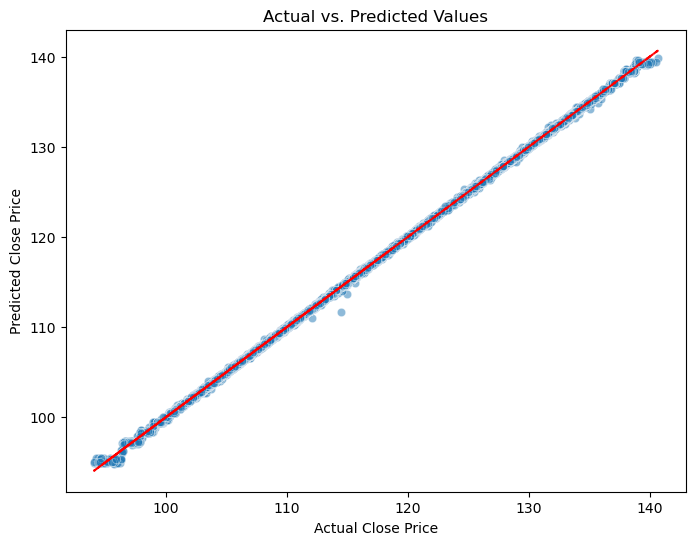

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already trained your XGBoost model and made predictions on the test set

# Plotting actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred.flatten(), alpha=0.5)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Plotting the diagonal line for reference
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.show()